# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 3 of Set 2 : mataura
Processing Record 4 of Set 2 : inuvik
Processing Record 5 of Set 2 : inirida
Processing Record 6 of Set 2 : chokurdakh
Processing Record 7 of Set 2 : esperance
Processing Record 8 of Set 2 : camabatela
Processing Record 9 of Set 2 : albany
City not found. Skipping...
Processing Record 10 of Set 2 : lagoa
Processing Record 11 of Set 2 : port hardy
Processing Record 12 of Set 2 : corinto
Processing Record 13 of Set 2 : rikitea
Processing Record 14 of Set 2 : port blair
Processing Record 15 of Set 2 : jamestown
Processing Record 16 of Set 2 : sangar
City not found. Skipping...
Processing Record 17 of Set 2 : lodja
Processing Record 18 of Set 2 : cockburn town
Processing Record 19 of Set 2 : vaini
Processing Record 20 of Set 2 : chumikan
Processing Record 21 of Set 2 : cape town
Processing Record 22 of Set 2 : westport
Processing Record 23 of Set 2 : talnakh
Processing Record 24 of Set 2 : port e

Processing Record 37 of Set 5 : flinders
Processing Record 38 of Set 5 : kennett
Processing Record 39 of Set 5 : les cayes
City not found. Skipping...
Processing Record 40 of Set 5 : goderich
Processing Record 41 of Set 5 : ruidoso
Processing Record 42 of Set 5 : barrow
Processing Record 43 of Set 5 : manokwari
Processing Record 44 of Set 5 : tasiilaq
Processing Record 45 of Set 5 : bilibino
City not found. Skipping...
Processing Record 46 of Set 5 : kaeo
Processing Record 47 of Set 5 : iqaluit
Processing Record 48 of Set 5 : jacareacanga
Processing Record 49 of Set 5 : torbay
Processing Record 50 of Set 5 : saint-philippe
Processing Record 0 of Set 6 : brzesko
Processing Record 1 of Set 6 : dunedin
Processing Record 2 of Set 6 : jalingo
Processing Record 3 of Set 6 : cherskiy
Processing Record 4 of Set 6 : chaman
City not found. Skipping...
Processing Record 5 of Set 6 : praia da vitoria
Processing Record 6 of Set 6 : prince rupert
Processing Record 7 of Set 6 : marawi
Processing Reco

Processing Record 22 of Set 9 : aklavik
Processing Record 23 of Set 9 : kungurtug
Processing Record 24 of Set 9 : moose factory
Processing Record 25 of Set 9 : kayerkan
Processing Record 26 of Set 9 : teya
City not found. Skipping...
Processing Record 27 of Set 9 : soubre
Processing Record 28 of Set 9 : synya
City not found. Skipping...
Processing Record 29 of Set 9 : verkhniy naur
Processing Record 30 of Set 9 : zaragoza
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 9 : hornepayne
Processing Record 32 of Set 9 : coahuayana
Processing Record 33 of Set 9 : guerrero negro
Processing Record 34 of Set 9 : sandviken
Processing Record 35 of Set 9 : newport
City not found. Skipping...
Processing Record 36 of Set 9 : el campo
Processing Record 37 of Set 9 : price
Processing Record 38 of Set 9 : penzance
City not found. Skipping...
Processing Record 39 of Set 9 : bonthe
Processing Record 40 of Set 9 : oranjemund
Processing Record 41 of Set 9 : sinjai
Proces

Processing Record 0 of Set 13 : warrnambool
Processing Record 1 of Set 13 : manutuke
Processing Record 2 of Set 13 : black river
Processing Record 3 of Set 13 : mbouda
City not found. Skipping...
Processing Record 4 of Set 13 : bodden town
Processing Record 5 of Set 13 : tobermory
Processing Record 6 of Set 13 : golyshmanovo
Processing Record 7 of Set 13 : miramas
Processing Record 8 of Set 13 : lircay
Processing Record 9 of Set 13 : springbok
Processing Record 10 of Set 13 : zonguldak
Processing Record 11 of Set 13 : san francisco
Processing Record 12 of Set 13 : tautira
Processing Record 13 of Set 13 : aljezur
Processing Record 14 of Set 13 : gigmoto
Processing Record 15 of Set 13 : makakilo city
City not found. Skipping...
Processing Record 16 of Set 13 : kushmurun
City not found. Skipping...
Processing Record 17 of Set 13 : stromness
Processing Record 18 of Set 13 : seminole
Processing Record 19 of Set 13 : baglung
Processing Record 20 of Set 13 : tukan
Processing Record 21 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Display the Data Frame
weather_dict.count()

City          637
Cloudiness    637
Country       637
Date          637
Humidity      637
Lat           637
Lng           637
Max Temp      637
Wind Speed    637
dtype: int64

In [8]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,87,NZ,1600828761,76,-46.19,168.86,59.00,5.99
1,Inuvik,75,CA,1600828983,87,68.35,-133.72,42.80,2.24
2,Inírida,55,CO,1600829180,86,3.87,-67.92,77.29,2.35
3,Chokurdakh,48,RU,1600828765,68,70.63,147.92,48.29,8.46
4,Esperance,40,AU,1600828856,67,-33.87,121.90,59.00,4.70
...,...,...,...,...,...,...,...,...,...
632,Brasília de Minas,79,BR,1600829403,82,-16.21,-44.43,68.04,8.63
633,Santa Maria,1,BR,1600829403,81,-29.68,-53.81,53.60,8.05
634,Cervo,97,ES,1600829403,88,43.67,-7.41,62.01,13.00
635,Nouakchott,0,MR,1600828830,83,18.09,-15.98,80.60,8.05


In [29]:
# Save data to .csv in working directory.

weather_dict.to_csv('city_weather_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

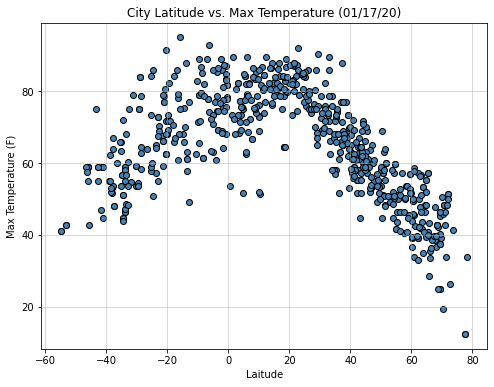

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

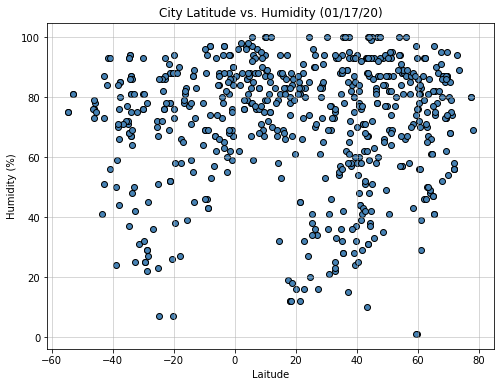

In [14]:
# Create Latitude vs. Humidity Plot scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

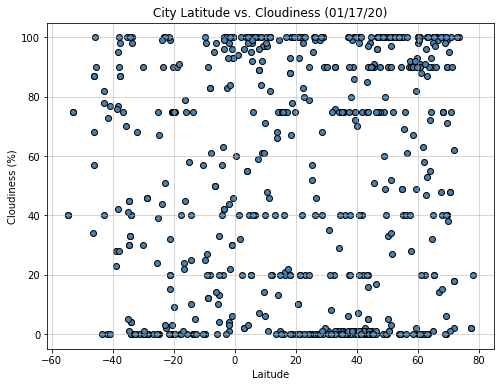

In [15]:
# Create Latitude vs. Cloudiness Plot scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")


## Latitude vs. Wind Speed Plot

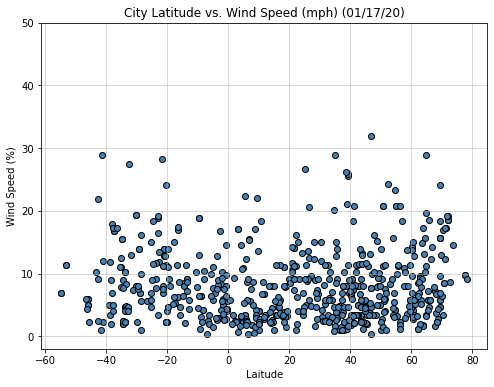

In [16]:
# Create Latitude vs. Wind Speed scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")


## Linear Regression

In [17]:
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # --- use the axes specified ---
    ax = ax
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    # --- create line equation ---
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # --- plot the linear model ---
    ax.plot(x, regress_values, color="firebrick")
    
    # --- return the plot and line equation created ---
    return ax, line_eq

In [18]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0, :].copy().reset_index(drop=True)
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp"]
north_humidity = northern_hemisphere["Humidity"]
north_cloudiness = northern_hemisphere["Cloudiness"]
north_windspeed = northern_hemisphere["Wind Speed"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp"]
south_humidity = southern_hemisphere["Humidity"]
south_cloudiness = southern_hemisphere["Cloudiness"]
south_windspeed = southern_hemisphere["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7094456114610278


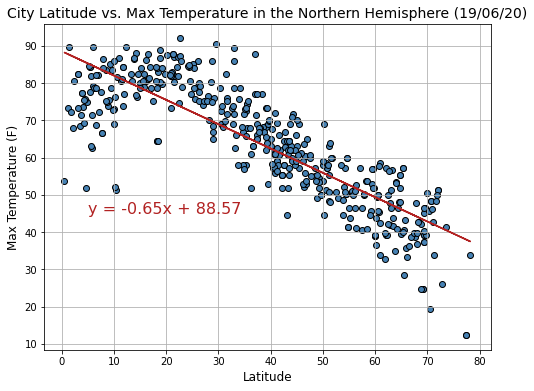

In [19]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="steelblue", edgecolors="black")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.4810116815575026


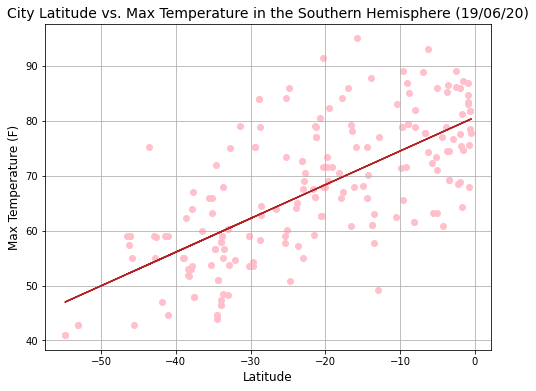

In [20]:

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="pink", edgecolors="pink")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-temp-linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.0017719383913902638


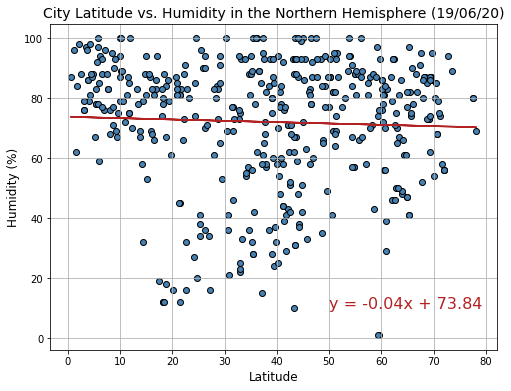

In [21]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="steelblue", edgecolors="black")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(50,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-humidity-linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.014903292985022333


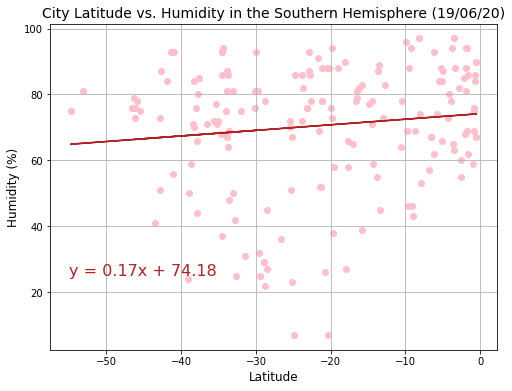

In [22]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="pink", edgecolors="pink")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-humidity-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 8.244131908131963e-05


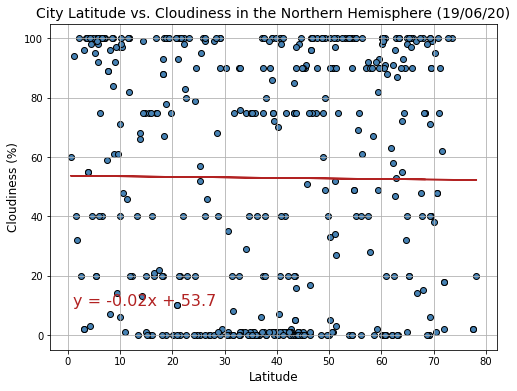

In [23]:

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="steelblue", edgecolors="black")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.0002739824062365588


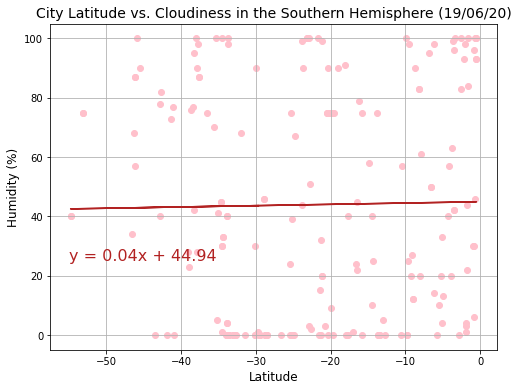

In [24]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="pink", edgecolors="pink")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.028772963607048056


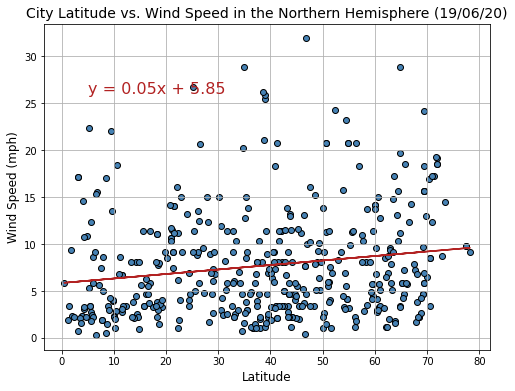

In [25]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="steelblue", edgecolors="black")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.020189123750474595


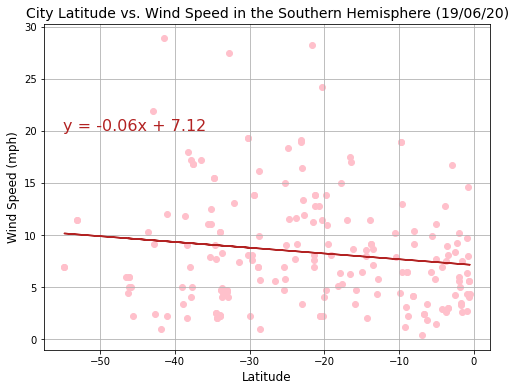

In [26]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="pink", edgecolors="pink")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-windspeed-linreg.png")
plt.show()